<a href="https://colab.research.google.com/github/aminayusif/EngageIQ/blob/main/EngageIQ_Predictive_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

**EngageIQ** is an intelligent, data-driven marketing analytics project designed to revolutionize how businesses understand and engage with their customers. Powered by supervised and unsupervised machine learning techniques, this project aims to predict user purchase likelihood based on behavioral, engagement, and content interaction data. The core goal is to enable marketing teams to identify high-value prospects and optimize their campaigns using AI-powered insights.

At its foundation, **EngageIQ** uses key engagement metrics such as likes, shares, comments, clicks, time spent on platform, and ad interactions, along with past purchase behavior and exposure to marketing keywords (e.g., “discount,” “exclusive,” “new”) to forecast customer intent. The first phase applies supervised learning models—such as logistic regression, random forest, and XGBoost—to predict the binary outcome of whether a user is likely to purchase. Evaluation metrics like precision, recall, F1-score, and ROC AUC guide performance assessment, ensuring the model is robust and reliable.

Beyond prediction, the project integrates unsupervised learning techniques like K-Means clustering to segment users based on similarities in engagement and responsiveness to campaigns. This allows businesses to tailor content and outreach strategies for different customer personas, increasing the efficiency of marketing spend.

In future phases, **EngageIQ** will incorporate deep learning models such as neural networks to capture more complex patterns in user behavior. It will also adopt agentic AI principles, deploying intelligent AI agents capable of autonomously analyzing trends, suggesting personalized campaigns, and adapting strategies based on real-time user data. Additionally, generative AI models will be used to dynamically craft personalized marketing messages, ads, or offers based on customer profiles and predicted preferences.

With a scalable design and an emphasis on explainability, **EngageIQ** is not just a machine learning model but a strategic decision-support tool. It enables marketers to shift from reactive to proactive engagement, making data a central driver of innovation and growth.

### Exploratory Data Analysis and Data Preprocessing

#### Import common libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [2]:
data=pd.read_csv('/content/marketing_data.csv')


In [3]:
data.head()

,User_ID,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,...,coupon,deal,discount,exclusive,limited,new,offer,product,sale,shopping
0,1,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,Low,0,...,0.570089,0.000000,0.000000,0.000000,0.000000,0.000000,0.593544,0.000000,0.000000,0.0
1,2,0.841365,0.482412,0.53,0.74,0.466667,0.697987,0,High,1,...,0.000000,0.563362,0.000000,0.000000,0.000000,0.000000,0.594854,0.000000,0.000000,0.0
2,3,0.847390,0.351759,0.43,0.12,0.000000,0.187919,1,Low,1,...,0.000000,0.000000,0.491103,0.000000,0.000000,0.489434,0.000000,0.512291,0.000000,0.0
3,4,0.698795,0.291457,0.27,0.76,0.500000,0.885906,0,High,1,...,0.000000,0.000000,0.562483,0.000000,0.582526,0.000000,0.000000,0.586751,0.000000,0.0
4,5,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,Low,1,...,0.516121,0.000000,0.000000,0.495195,0.000000,0.000000,0.000000,0.000000,0.473183,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 500 non-null    int64  
 1   Likes                   500 non-null    float64
 2   Shares                  500 non-null    float64
 3   Comments                500 non-null    float64
 4   Clicks                  500 non-null    float64
 5   Engagement_with_Ads     500 non-null    float64
 6   Time_Spent_on_Platform  500 non-null    float64
 7   Purchase_History        500 non-null    int64  
 8   Engagement_Level        500 non-null    object 
 9   Purchase_Likelihood     500 non-null    int64  
 10  brand                   500 non-null    float64
 11  buy                     500 non-null    float64
 12  coupon                  500 non-null    float64
 13  deal                    500 non-null    float64
 14  discount                500 non-null    fl

In [5]:
data.shape

(500, 22)

Dataset contains 500 rows and 22 columns

Check to see if dataset contains any null values

In [6]:
data.isnull().sum()

,0
User_ID,0
Likes,0
Shares,0
Comments,0
Clicks,0
Engagement_with_Ads,0
Time_Spent_on_Platform,0
Purchase_History,0
Engagement_Level,0
Purchase_Likelihood,0


####  Class Distributions

Target variable is Purchase_Likelihood

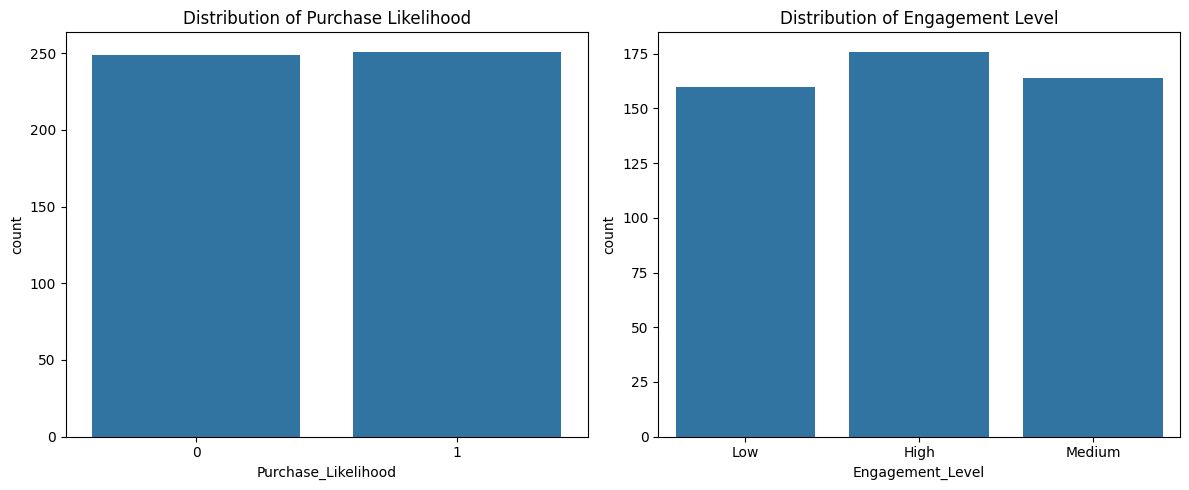

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Purchase_Likelihood')
plt.title('Distribution of Purchase Likelihood')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Engagement_Level')
plt.title('Distribution of Engagement Level')

plt.tight_layout()
plt.show()

In [8]:
data.describe()

,User_ID,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Purchase_Likelihood,brand,...,coupon,deal,discount,exclusive,limited,new,offer,product,sale,shopping
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,0.507096,0.501698,0.495660,0.508080,0.491000,0.492899,0.448000,0.502000,0.133896,...,0.130940,0.136246,0.137452,0.148840,0.133227,0.136710,0.121888,0.130765,0.154044,0.133298
std,144.481833,0.293279,0.298460,0.275211,0.303279,0.295421,0.288483,0.497787,0.500497,0.254030,...,0.251169,0.254150,0.252878,0.267654,0.258666,0.250267,0.247958,0.255580,0.256113,0.257771
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.750000,0.254016,0.231156,0.270000,0.260000,0.233333,0.253356,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250.500000,0.494980,0.489950,0.500000,0.500000,0.466667,0.466443,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,375.250000,0.764056,0.773869,0.720000,0.800000,0.733333,0.733221,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.461313,0.000000
max,500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.950291,1.000000,1.000000,1.000000,0.893817,1.000000,1.000000,0.876481,0.901117


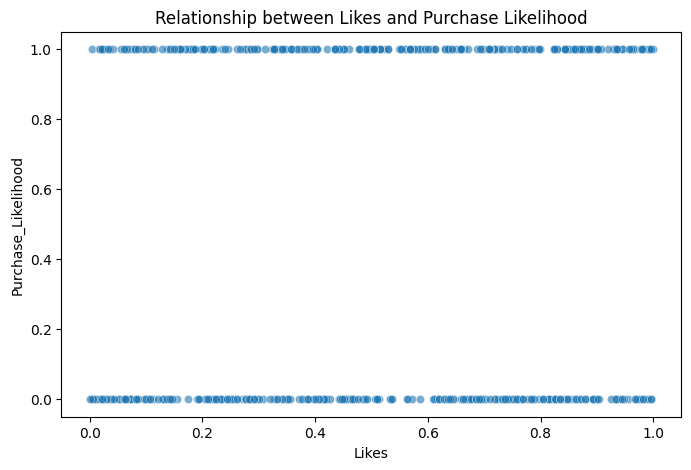

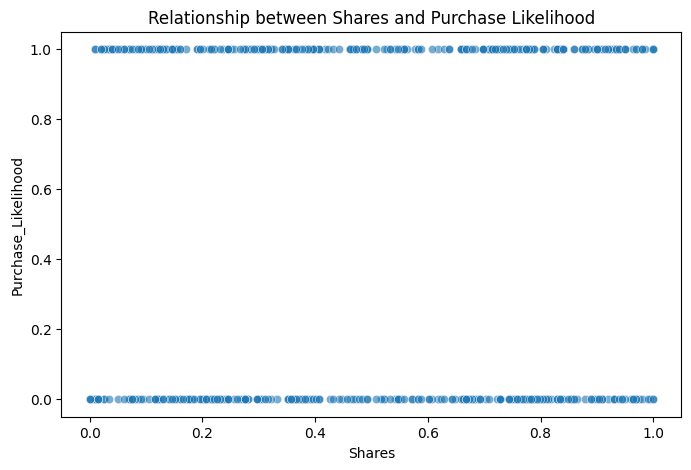

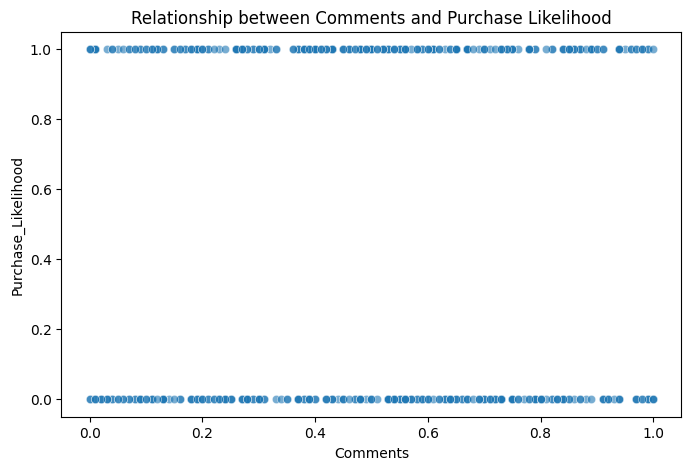

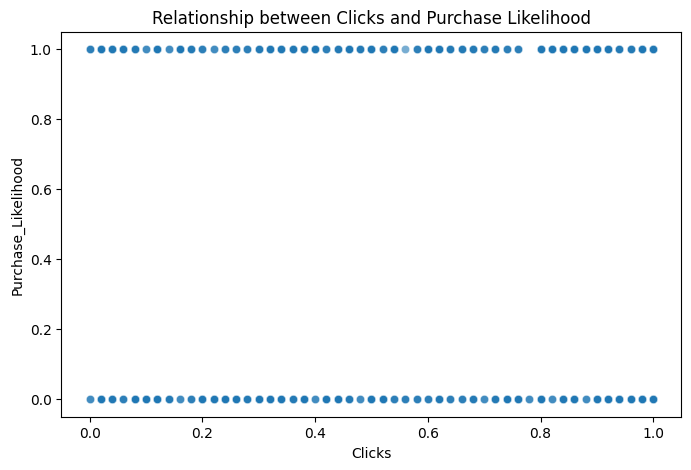

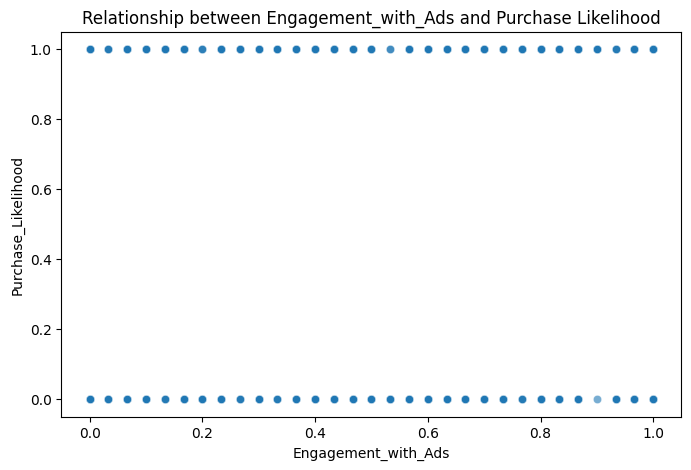

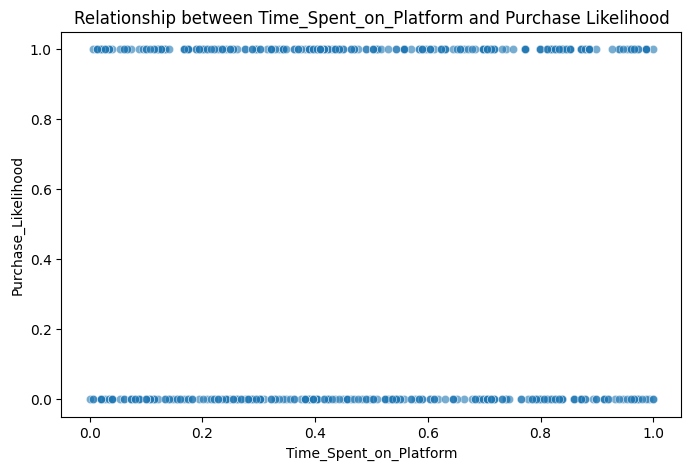

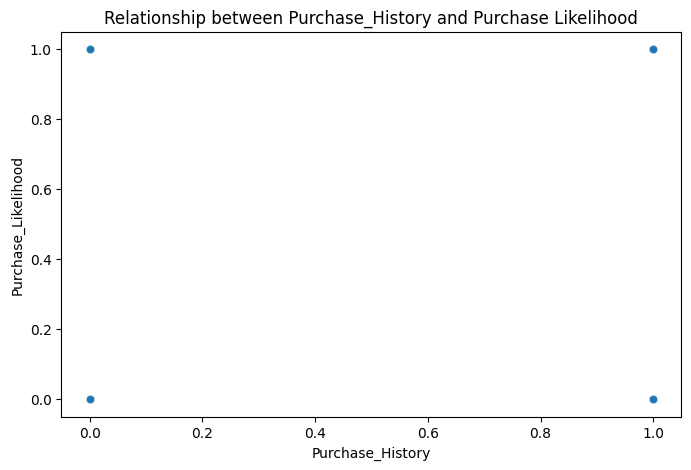

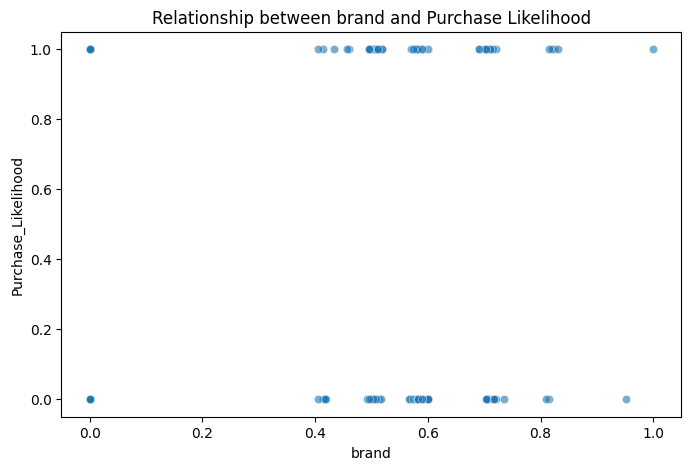

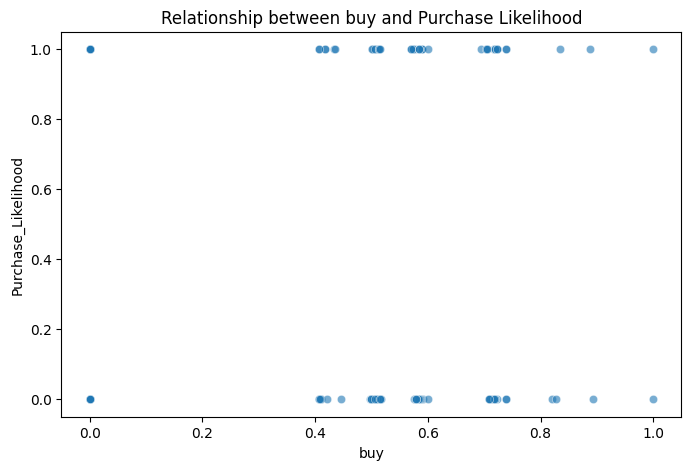

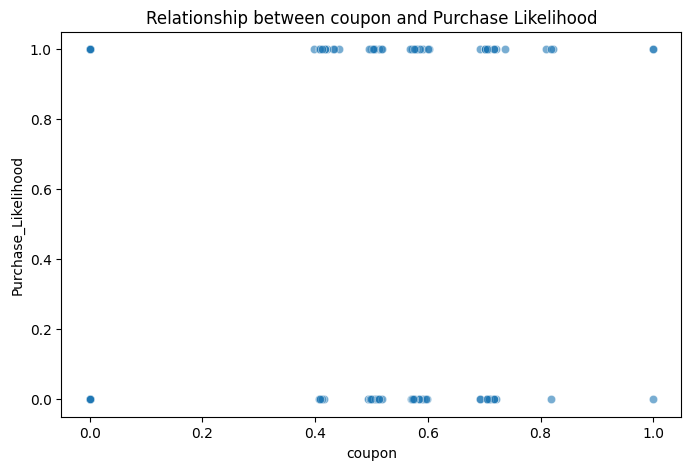

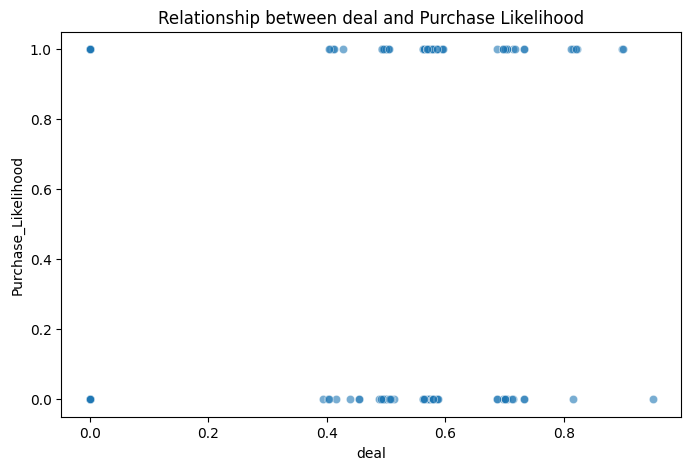

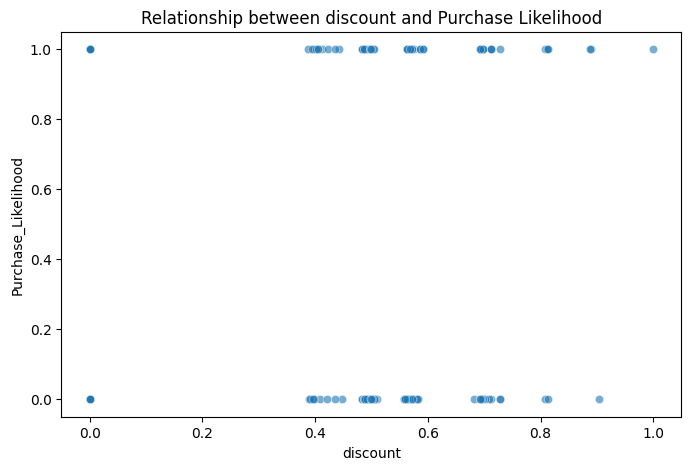

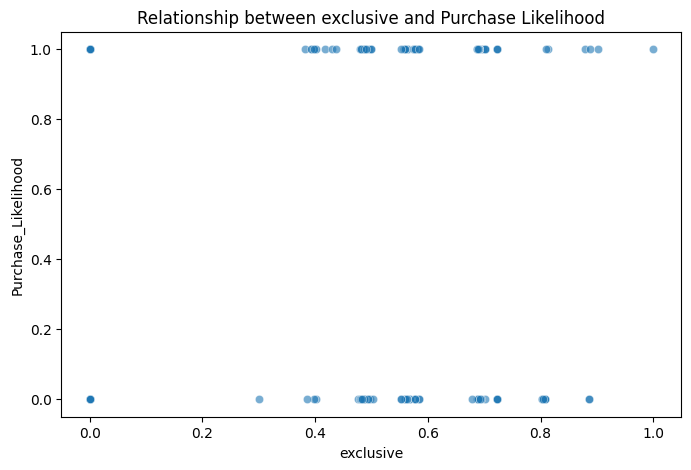

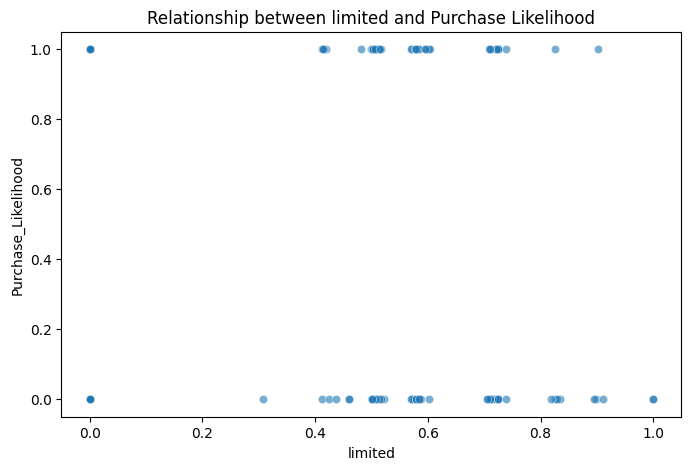

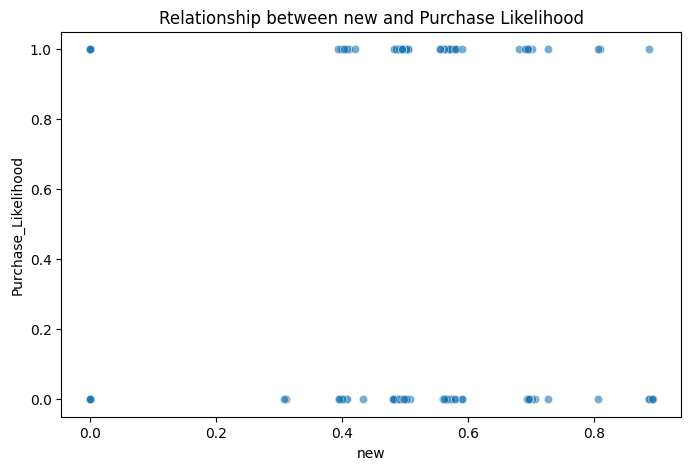

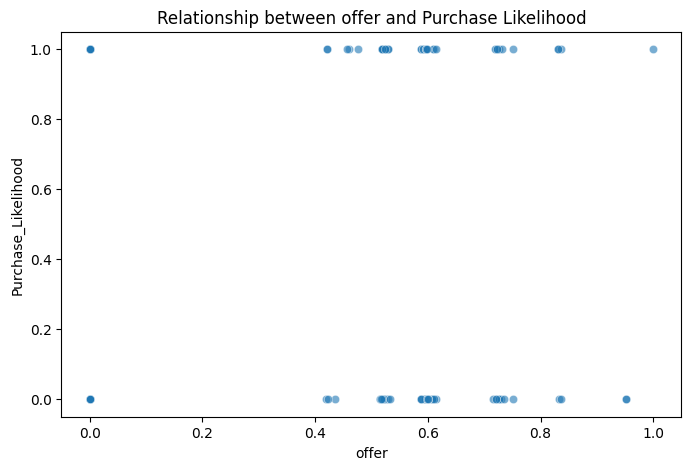

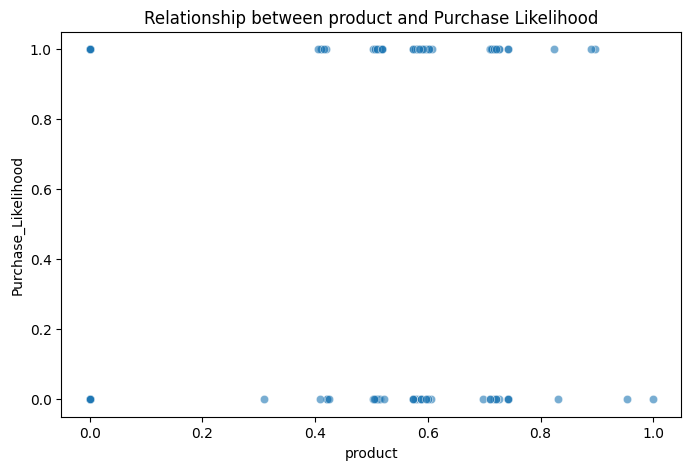

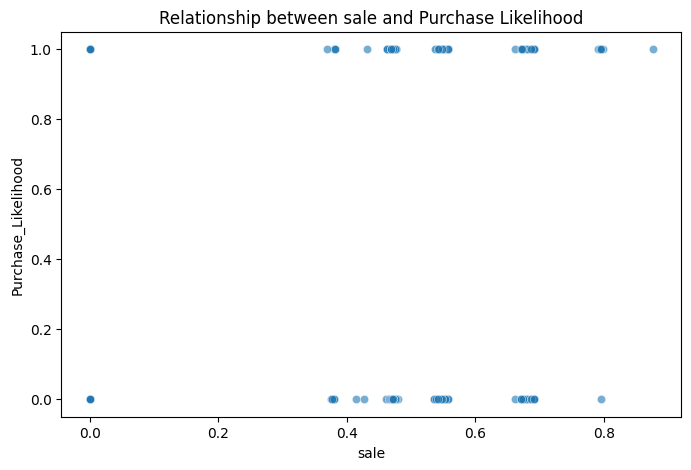

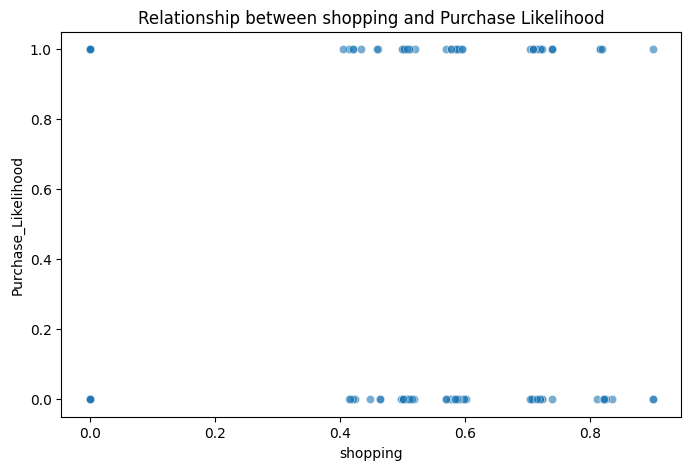

In [9]:
numerical_features = ['Likes', 'Shares', 'Comments', 'Clicks', 'Engagement_with_Ads', 'Time_Spent_on_Platform', 'Purchase_History', 'brand', 'buy', 'coupon', 'deal', 'discount', 'exclusive', 'limited', 'new', 'offer', 'product', 'sale', 'shopping']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=feature, y='Purchase_Likelihood', alpha=0.6)
    plt.title(f'Relationship between {feature} and Purchase Likelihood')
    plt.show()

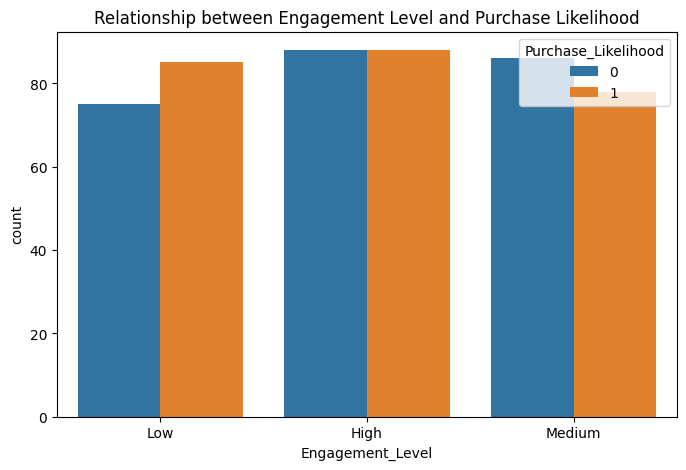

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Engagement_Level', hue='Purchase_Likelihood')
plt.title('Relationship between Engagement Level and Purchase Likelihood')
plt.show()

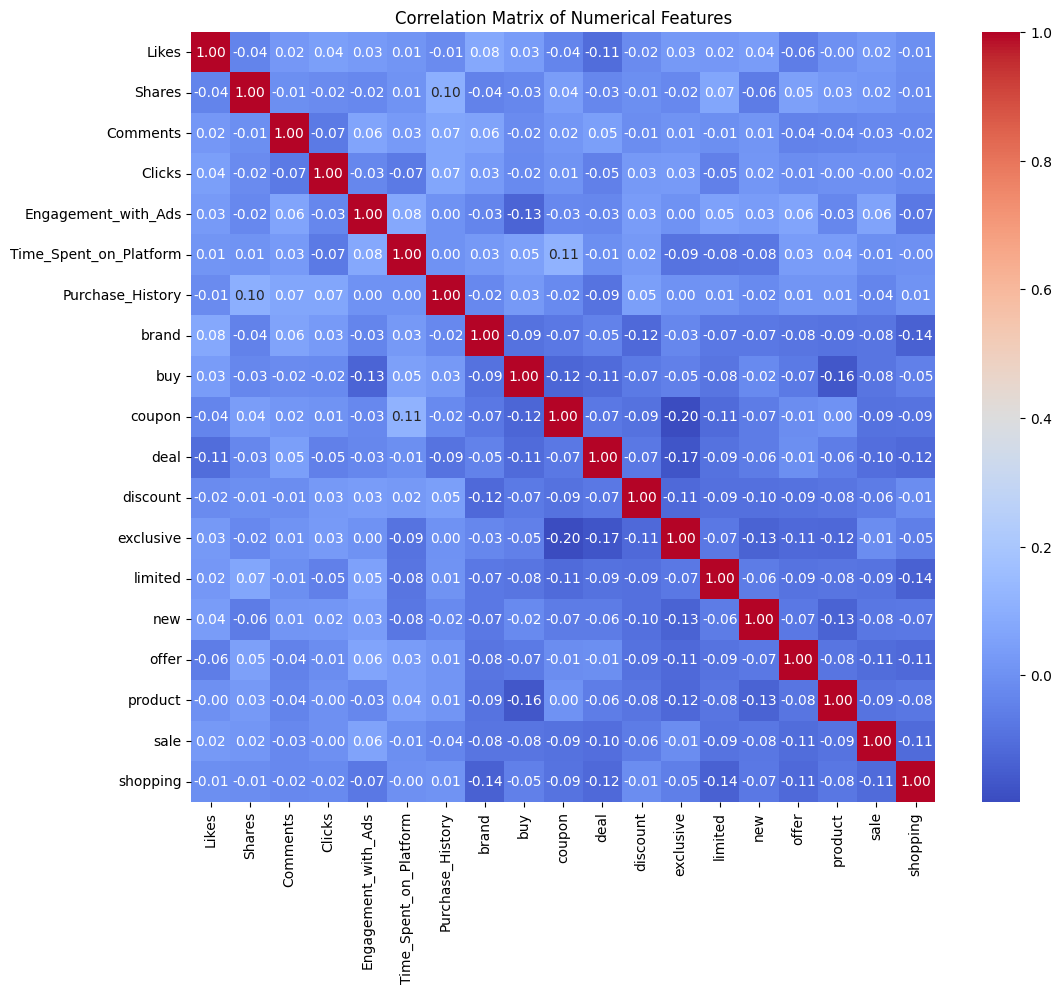

In [12]:
correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()